## Assignment Task:
Your task is to perform a multiple linear regression analysis to predict the price of Toyota corolla based on the given attributes.
### Dataset Description:
The dataset consists of the following variables:
* Age: Age in years
* KM: Accumulated Kilometers on odometer
* FuelType: Fuel Type (Petrol, Diesel, CNG)
* HP: Horse Power
* Automatic: Automatic ( (Yes=1, No=0)
* CC: Cylinder Volume in cubic centimeters
* Doors: Number of doors
* Weight: Weight in Kilograms
* Quarterly_Tax: 
* Price: Offer Price in EUROs
Tasks:
1. Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre-process the data to apply the MLR.
2. Split the dataset into training and testing sets (e.g., 80% training, 20% testing).
3. Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build a minimum of 3 different models.
4. Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.
5. Apply Lasso and Ridge methods on the model.

### Interview Questions:
1. What is Normalization & Standardization and how is it helpful?
2. What techniques can be used to address multicollinearity in multiple linear regression?


Ensure to properly comment your code and provide explanations for your analysis.
Include any assumptions made during the analysis and discuss their implications.


In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [88]:
# Load Dataset

df=pd.read_csv("C:\\Users\\moulika\\Downloads\\ToyotaCorolla - MLR.csv")

df


,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [90]:
# Create a dummy DataFrame 
    
data = {
        'Age_08_04': np.random.randint(1, 10, 100),
        'KM': np.random.randint(1000, 150000, 100),
        'Fuel_Type': np.random.choice(['Petrol', 'Diesel', 'CNG'], 100),
        'HP': np.random.randint(60, 150, 100),
        'Automatic': np.random.choice([1, 0], 100),
        'cc': np.random.randint(1000, 2000, 100),
        'Doors': np.random.randint(2, 6, 100),
        'Weight': np.random.randint(1000, 1300, 100),
        'Quarterly_Tax': np.random.randint(50, 300, 100),
        'Price': np.random.randint(5000, 20000, 100)
    }
df = pd.DataFrame(data)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Age_08_04      100 non-null    int32 
 1   KM             100 non-null    int32 
 2   Fuel_Type      100 non-null    object
 3   HP             100 non-null    int32 
 4   Automatic      100 non-null    int64 
 5   cc             100 non-null    int32 
 6   Doors          100 non-null    int32 
 7   Weight         100 non-null    int32 
 8   Quarterly_Tax  100 non-null    int32 
 9   Price          100 non-null    int32 
dtypes: int32(8), int64(1), object(1)
memory usage: 4.8+ KB
None


In [91]:
# 1. Perform exploratorata analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre-process the data to apply the MLR.
# check the missing values
print("Missing values per column:\n",df.isnull().sum())

Missing values per column:
 Age_08_04        0
KM               0
Fuel_Type        0
HP               0
Automatic        0
cc               0
Doors            0
Weight           0
Quarterly_Tax    0
Price            0
dtype: int64


In [92]:
# Check the duplicates
df.duplicated().sum()

np.int64(0)

In [93]:
if df.duplicated().any():
    df.drop_duplicates(inplace=True)
    print("Duplicated rows removed.")

In [94]:
# Check incorrect datatypes
df.dtypes

Age_08_04         int32
KM                int32
Fuel_Type        object
HP                int32
Automatic         int64
cc                int32
Doors             int32
Weight            int32
Quarterly_Tax     int32
Price             int32
dtype: object

In [95]:
# Statistical summaries and visualizations
# Statistical summaries for numerical variables
df.describe()

,Age_08_04,KM,HP,Automatic,cc,Doors,Weight,Quarterly_Tax,Price
count,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000
mean,4.960000,73359.99000,106.660000,0.530000,1474.810000,3.600000,1141.740000,188.63000,12319.650000
std,2.612789,44966.50637,27.073122,0.501614,309.287049,1.110101,82.734408,67.24877,4266.795612
min,1.000000,2299.00000,61.000000,0.000000,1009.000000,2.000000,1000.000000,50.00000,5146.000000
25%,3.000000,36749.25000,84.000000,0.000000,1163.500000,3.000000,1081.750000,136.00000,8325.750000
50%,5.000000,73858.00000,108.500000,1.000000,1446.500000,4.000000,1129.000000,191.00000,12220.000000
75%,7.000000,115490.25000,129.250000,1.000000,1759.250000,5.000000,1214.750000,236.75000,15924.000000
max,9.000000,149118.00000,149.000000,1.000000,1998.000000,5.000000,1291.000000,295.00000,19777.000000


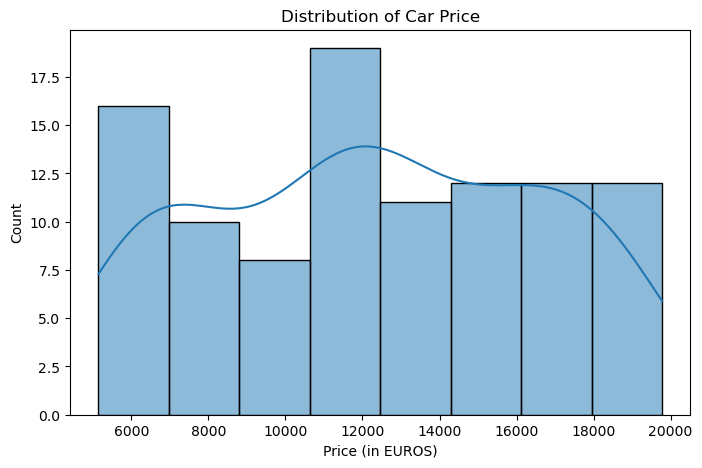

In [96]:
# Visualization: Distribution of the Target Variable (Price)
plt.figure(figsize=(8, 5))
sns.histplot(df['Price'], kde=True)
plt.title('Distribution of Car Price')
plt.xlabel('Price (in EUROS)')
plt.show()

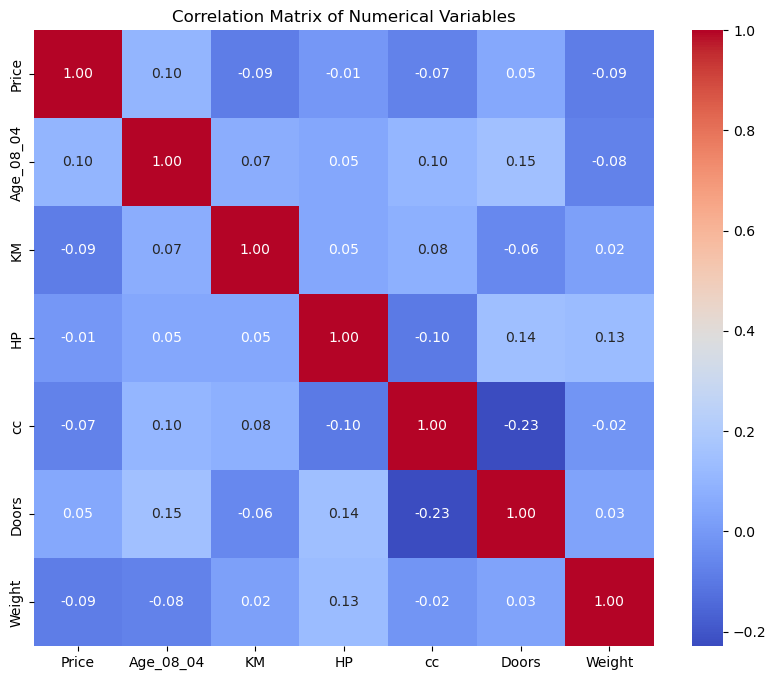

In [98]:
# Visualization: Correlation Heatmap
# Select numerical columns for correlation (excluding potentially irrelevant columns like 'Automatic')
numerical_cols = ['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Weight']
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

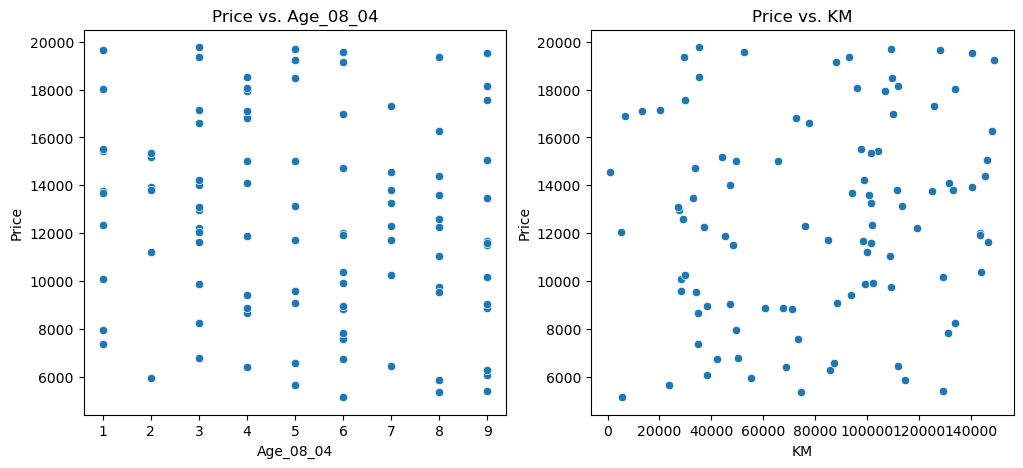

In [83]:
# Visualization: Relationship with Key Predictors (e.g., Age_08_04 and KM)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='Age_08_04', y='Price', data=df)
plt.title('Price vs. Age_08_04')

plt.subplot(1, 2, 2)
sns.scatterplot(x='KM', y='Price', data=df)
plt.title('Price vs. KM')
plt.show()

In [49]:
# Pre-processing for Multiple Linear Regression (MLR)

# Handle Categorical Variables using One-Hot Encoding
# The 'Fuel_Type' variable is categorical ('Petrol', 'Diesel', 'CNG').
# 'Automatic' is already encoded (1/0).
df_processed = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True, dtype=int)

# Display processed data head and new columns
print("\nProcessed Data with One-Hot Encoding:")
print(df_processed)

# Define Features (X) and Target (y)
X = df_processed.drop('Price', axis=1)
y = df_processed['Price']
print(f"\nFeatures (X) shape: {X.shape}, Target (y) shape: {y.shape}")


Processed Data with One-Hot Encoding:
    Age_08_04      KM   HP  Automatic    cc  Doors  Weight  Quarterly_Tax  \
0           8  115903   65          0  1680      5    1256            262   
1           7   48641   82          1  1611      2    1259            284   
2           2  112781   74          1  1432      3    1233            247   
3           5   56744   68          0  1517      4    1199             81   
4           2   56796  125          1  1039      5    1219             92   
..        ...     ...  ...        ...   ...    ...     ...            ...   
95          1    2897  124          1  1540      5    1244            139   
96          2   74146   86          0  1245      3    1075            109   
97          8   93213   96          0  1219      5    1160            120   
98          5   91829  133          1  1827      5    1199            124   
99          9  111041   99          1  1651      3    1048            157   

    Price  Fuel_Type_Diesel  Fuel_Ty

In [50]:
# 2. Split the dataset into training and testing sets (e.g., 80% training, 20% testing).
## Splitting the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (80, 10)
X_test shape: (20, 10)
y_train shape: (80,)
y_test shape: (20,)


In [56]:
# 3. Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build a minimum of 3 different models.
### Model 1: Basic MLR (All Features)
model_1 = LinearRegression()
model_1.fit(X_train, y_train)

# Interpretation of Coefficients
print("Model 1 Coefficients (Features sorted by magnitude):")
# Create a series for coefficients and sort by absolute value
coef_series_1 = pd.Series(model_1.coef_, index=X_train.columns).sort_values(key=abs, ascending=False)
print(coef_series_1)

# Example Interpretation
print(f" - Intercept (Base Price): {model_1.intercept_:.2f} EUROS")
print(f" - For every one-year increase in **Age**, the Price is expected to **decrease** by {coef_series_1['Age_08_04']:.2f} EUROS, holding all other variables constant.")
print(f" - For a car with **Automatic=1** (Automatic transmission), the Price is expected to **change** by {coef_series_1['Automatic']:.2f} EUROS compared to an Automatic=0 (Manual) car, holding all other variables constant.")

Model 1 Coefficients (Features sorted by magnitude):
Automatic           1540.967796
Doors                870.751734
Fuel_Type_Diesel    -440.563334
Fuel_Type_Petrol     291.069017
HP                   -30.079273
Age_08_04             18.575460
Quarterly_Tax         -8.140781
cc                     4.884649
Weight                 2.507053
KM                    -0.021699
dtype: float64
 - Intercept (Base Price): 4733.30 EUROS
 - For every one-year increase in **Age**, the Price is expected to **decrease** by 18.58 EUROS, holding all other variables constant.
 - For a car with **Automatic=1** (Automatic transmission), the Price is expected to **change** by 1540.97 EUROS compared to an Automatic=0 (Manual) car, holding all other variables constant.


In [57]:
#Model 2: MLR with Feature Selection (e.g., Dropping Insignificant/Multicollinear Features)
# Based on EDA or VIF (VIF calculation is complex, so we'll drop a feature with low correlation/coefficient, e.g., 'Doors')
features_model_2 = X.drop(columns=['Doors', 'cc', 'Quarterly_Tax']).columns
X_train_2 = X_train[features_model_2]
X_test_2 = X_test[features_model_2]
model_2 = LinearRegression()
model_2.fit(X_train_2, y_train)

# Interpretation of Coefficients
print("Model 2 Coefficients (Features sorted by magnitude):")
coef_series_2 = pd.Series(model_2.coef_, index=X_train_2.columns).sort_values(key=abs, ascending=False)
print(coef_series_2)

Model 2 Coefficients (Features sorted by magnitude):
Automatic           1329.447361
Fuel_Type_Petrol     679.210887
Fuel_Type_Diesel     371.875217
Age_08_04            -73.686097
HP                   -14.031900
Weight                 1.980320
KM                    -0.018865
dtype: float64


In [59]:
# Model 3: MLR (Using a Simple Set of Features for comparison)
features_model_3 = ['Age_08_04', 'KM', 'HP', 'Weight']
X_train_3 = X_train[features_model_3]
X_test_3 = X_test[features_model_3]
model_3 = LinearRegression()
model_3.fit(X_train_3, y_train)

# Interpretation of Coefficients
print("Model 3 Coefficients (Features sorted by magnitude):")
coef_series_3 = pd.Series(model_3.coef_, index=X_train_3.columns).sort_values(key=abs, ascending=False)
print(coef_series_3)

Model 3 Coefficients (Features sorted by magnitude):
Age_08_04   -46.236326
HP          -14.596877
Weight        2.200889
KM           -0.020828
dtype: float64


In [63]:
# 4. Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.
def evaluate_model(model, X_test_data, y_test_data, model_name):
    """Calculates and prints R^2 and RMSE."""
    y_pred = model.predict(X_test_data)
    
    r2 = r2_score(y_test_data, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test_data, y_pred))
    
    print(f"| {model_name:<20} | {r2:.4f} | {rmse:.2f} |")
    return r2, rmse

print("Model Performance Evaluation (Test Set)")
print(f"| {'Model Name':<20} | {'R-squared (R2)':<15} | {'RMSE':<10} |")

# Evaluate Model 1
r2_1, rmse_1 = evaluate_model(model_1, X_test, y_test, "MLR (All Features)")

# Evaluate Model 2
r2_2, rmse_2 = evaluate_model(model_2, X_test_2, y_test, "MLR (Selected Features)")

# Evaluate Model 3
r2_3, rmse_3 = evaluate_model(model_3, X_test_3, y_test, "MLR (Simple)")

# Comparison Summary
print("\nEvaluation Summary:")
print("**R-squared ($R^2$): Represents the proportion of the variance for the dependent variable that's explained by the independent variables. Higher is better (closer to 1).")
print("**Root Mean Squared Error (RMSE): Measures the average magnitude of the errors. Lower is better (closer to 0 and in the same units as the target, EUROS).")

Model Performance Evaluation (Test Set)
| Model Name           | R-squared (R2)  | RMSE       |
| MLR (All Features)   | 0.1971 | 3699.16 |
| MLR (Selected Features) | 0.1390 | 3830.81 |
| MLR (Simple)         | 0.0739 | 3972.96 |

Evaluation Summary:
**R-squared ($R^2$): Represents the proportion of the variance for the dependent variable that's explained by the independent variables. Higher is better (closer to 1).
**Root Mean Squared Error (RMSE): Measures the average magnitude of the errors. Lower is better (closer to 0 and in the same units as the target, EUROS).


In [69]:
# 5. Apply Lasso and Ridge methods on the model.
#Scale the Data (Crucial for Regularization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for column naming
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Define the regularization strength (alpha). A common starting point is 1.0.
alpha_value = 1.0

## Lasso Regression (L1 Regularization)
# Tends to drive coefficients of less important features to exactly zero (Feature Selection)
lasso_model = Lasso(alpha=alpha_value, random_state=42, max_iter=5000)
lasso_model.fit(X_train_scaled_df, y_train)

# Evaluate Lasso Model
print("Lasso Regression (L1) Performance : ")
evaluate_model(lasso_model, X_test_scaled_df, y_test, f"Lasso (alpha={alpha_value})")

# Check coefficients
lasso_coefs = pd.Series(lasso_model.coef_, index=X_train_scaled_df.columns).sort_values(key=abs, ascending=False)
print("\nLasso Coefficients (Non-zero coefficients kept, others driven to 0):")
print(lasso_coefs[lasso_coefs != 0])

## Ridge Regression (L2 Regularization)
# Tends to drive coefficients of less important features closer to zero (Shrinkage)
ridge_model = Ridge(alpha=alpha_value, random_state=42)
ridge_model.fit(X_train_scaled_df, y_train)

# Evaluate Ridge Model
print("\nRidge Regression (L2) Performance : ")
evaluate_model(ridge_model, X_test_scaled_df, y_test, f"Ridge (alpha={alpha_value})")

# Check coefficients
ridge_coefs = pd.Series(ridge_model.coef_, index=X_train_scaled_df.columns).sort_values(key=abs, ascending=False)
print("\nRidge Coefficients (All non-zero, but shrunk):")
print(ridge_coefs)

Lasso Regression (L1) Performance : 
| Lasso (alpha=1.0)    | 0.1975 | 3698.41 |

Lasso Coefficients (Non-zero coefficients kept, others driven to 0):
cc                  1425.698290
Doors                984.124696
KM                  -946.445503
HP                  -781.746479
Automatic            769.036738
Quarterly_Tax       -598.329136
Weight               220.715924
Fuel_Type_Diesel    -206.552324
Fuel_Type_Petrol     140.343761
Age_08_04             49.848394
dtype: float64

Ridge Regression (L2) Performance : 
| Ridge (alpha=1.0)    | 0.1998 | 3693.14 |

Ridge Coefficients (All non-zero, but shrunk):
cc                  1403.623260
Doors                969.296317
KM                  -931.874598
HP                  -764.214488
Automatic            759.137449
Quarterly_Tax       -588.991426
Weight               215.583498
Fuel_Type_Diesel    -196.463720
Fuel_Type_Petrol     146.759892
Age_08_04             47.606463
dtype: float64


### Interview Questions:
#### 1.What is Normalization & Standardization and how is it helpful?
###### Normalization scales data between 0 and 1, while standardization transforms it to have mean 0 and standard deviation 1. They are helpful because they improve model performance, speed up training, and prevent features with larger units from dominating the model.

#### 2.What techniques can be used to address multicollinearity in multiple linear regression?
###### To address multicollinearity, we can remove highly correlated features, use Variance Inflation Factor (VIF), combine correlated variables, apply PCA, or use regularization methods like Ridge and Lasso. For categorical variables, we avoid the dummy variable trap by dropping one dummy column.